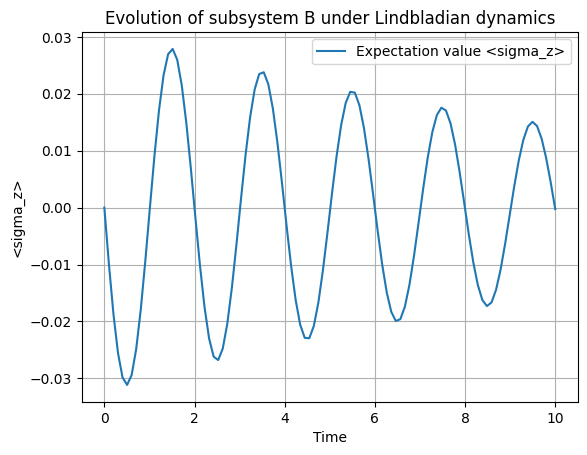

Steady state of subsystem B:
 Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.49974683+0.j         0.        -0.01590744j]
 [0.        +0.01590744j 0.50025317+0.j        ]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Define parameters
t_list = np.linspace(0, 10, 100)  # Time evolution from t=0 to t=10
gamma = 0.1  # Decay rate

# Define basis states for a single qubit
up = basis(2, 0)
down = basis(2, 1)

# Define initial state of subsystem B (as an example)
initial_state_B = (up + down).unit() * (up + down).unit().dag()

# Define the Lindbladian (L) for the Markov semigroup
H = 0.5 * np.pi * sigmax()  # Hamiltonian part (using Pauli X for simplicity)
c_ops = [np.sqrt(gamma) * sigmam()]  # Collapse operator (amplitude damping)

# Time-evolution of the density matrix for subsystem B
result = mesolve(H, initial_state_B, t_list, c_ops, [])

# Extract the expectation values
exp_vals = expect(sigmaz(), result.states)

# Plot the evolution of expectation value <sigma_z> for subsystem B
plt.plot(t_list, exp_vals, label="Expectation value <sigma_z>")
plt.xlabel('Time')
plt.ylabel('<sigma_z>')
plt.title('Evolution of subsystem B under Lindbladian dynamics')
plt.legend()
plt.grid()
plt.show()

# Finding the fixed point (steady state) of the system
steady_state = steadystate(H, c_ops)

# Display the steady state
print("Steady state of subsystem B:\n", steady_state)
